Training started...
Processing dataset: 207_autoPrice.tsv


/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 20.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 20.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 20.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 20.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 25.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("k should be >=0, <= n_features; got 25.Use k='all' to return all features.",)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:479: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError("

{'feature_selection__k': 5, 'regression__C': 50, 'regression__epsilon': 0.1}
Absolute error: 1682.27


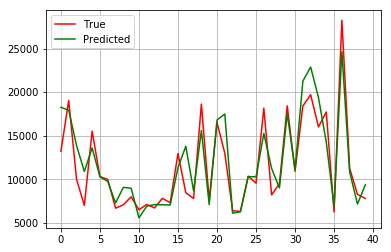

Finished dataset: 207_autoPrice.tsv
------------------------------------------------------------
Training finished
Mean squared error 
 1682.2707396842604
Total time taken: 9


In [3]:
import sys
import time
import pandas as pd
from sklearn import model_selection
from sklearn import svm, metrics, cluster
from matplotlib import pyplot as plt
import scipy
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_selection import *
from sklearn.model_selection import GridSearchCV

start_time = time.time()
datasets = ["195_auto_price.tsv", "197_cpu_act.tsv", "207_autoPrice.tsv", "192_vineyard.tsv", '210_cloud.tsv']
datasets = ["207_autoPrice.tsv"]

regressor = Pipeline([
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', svm.LinearSVR())
])

LinearSVR_parameters = [{'feature_selection__k': [1, 2, 3, 4, 5, 8, 15, 20, 25], \
                         'regression__epsilon':[0.001, 0.005, 0.01, 0.1, 1], \
                         'regression__C':[0.01, 0.1, 0.05, 1, 2, 5, 10, 50, 100] \
                        }]

print('Training started...')
dataset_accuracies = list()
for d_set in datasets:
    print("Processing dataset: %s" % d_set)
    data_path = "data/" + d_set
    df = pd.read_csv(data_path, sep="\t")
    label = df["target"].copy()
    data = df.drop("target", axis=1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data, label, test_size=0.25, random_state=42)
    
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    optimized_regressor = GridSearchCV(regressor, LinearSVR_parameters, cv=5, error_score=0)
    
    optimized_regressor.fit(X_train, y_train)
    best_regressor = optimized_regressor.best_estimator_
    best_result = optimized_regressor.cv_results_
    
    print(optimized_regressor.best_params_)
    prediction = best_regressor.predict(X_test)
    
    mse = np.mean([np.abs(x-y) for x, y in zip(prediction, y_test)])
    print("Absolute error: %0.2f" % mse)
    dataset_accuracies.append(mse)
    
    plt.figure()
    plt.plot(y_test, color='r')
    plt.plot(prediction, color='g')
    plt.grid(True)
    plt.legend(['True', 'Predicted'])
    plt.show()
    print("Finished dataset: %s" % d_set)
    print("------------------------------------------------------------")
    
print('Training finished')
print("Mean squared error \n", np.mean(dataset_accuracies))
end_time = time.time()
print('Total time taken: %d' % int(end_time - start_time))

